In [10]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [11]:
class State(TypedDict):
    hello: str

graph_builder = StateGraph(State)

In [12]:
def node_1(state: State):
    print("node_1 : " , state)
    return {
        "hello": "from node one."
    }

def node_2(state: State):
    print("node_2 : " , state)
    return {
        "hello": "from node 2."
    }

def node_3(state: State):
    print("node_3 : " , state)
    return {
        "hello": "from node 3."
    }


In [13]:
graph_builder.add_node("node_1", node_1)
graph_builder.add_node("node_2", node_2)
graph_builder.add_node("node_3", node_3)

graph_builder.add_edge(START, "node_1")
graph_builder.add_edge("node_1", "node_2")
graph_builder.add_edge("node_2", "node_3")
graph_builder.add_edge("node_3", END)

graph = graph_builder.compile()



# graph.invoke({"hello": "world"})




In [14]:
result = graph.invoke({"hello": "world"})

print(result)

node_1 :  {'hello': 'world'}
node_2 :  {'hello': 'from node one.'}
node_3 :  {'hello': 'from node 2.'}
{'hello': 'from node 3.'}


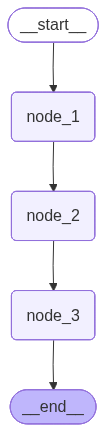

In [15]:
graph

In [ ]:
print(graph.get_graph().draw_ascii())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	node_1(node_1)
	node_2(node_2)
	node_3(node_3)
	__end__([<p>__end__</p>]):::last
	__start__ --> node_1;
	node_1 --> node_2;
	node_2 --> node_3;
	node_3 --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

